## Import dependencies

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read files

In [2]:
# Read shapefile
ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

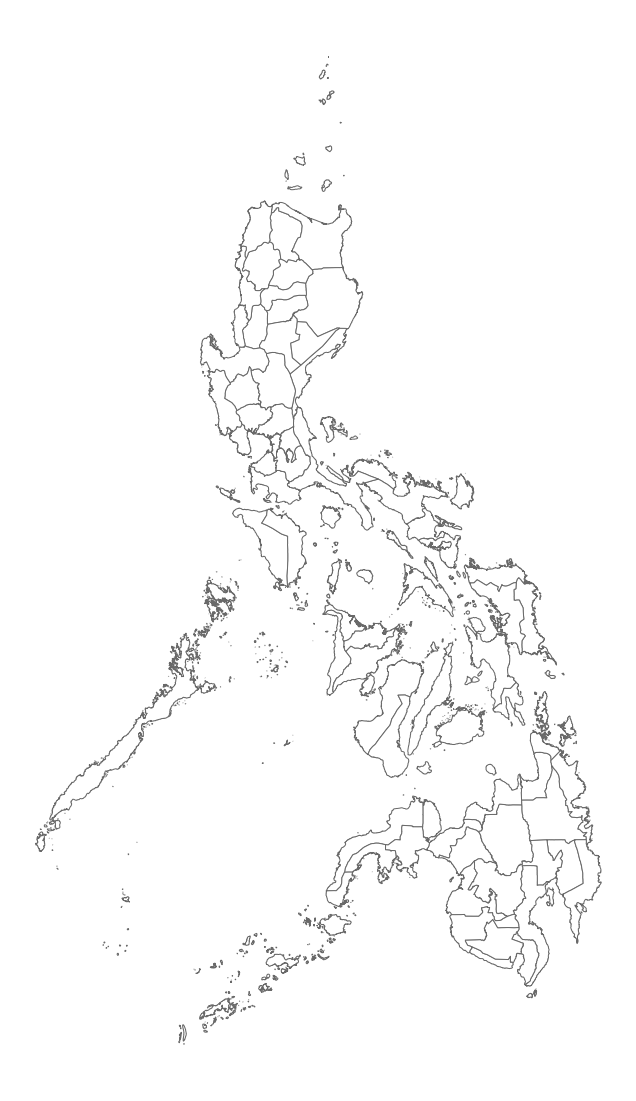

In [3]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [4]:
# Read GeoJSON file
healthsites = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


## Check if coodinates are the same

In [5]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


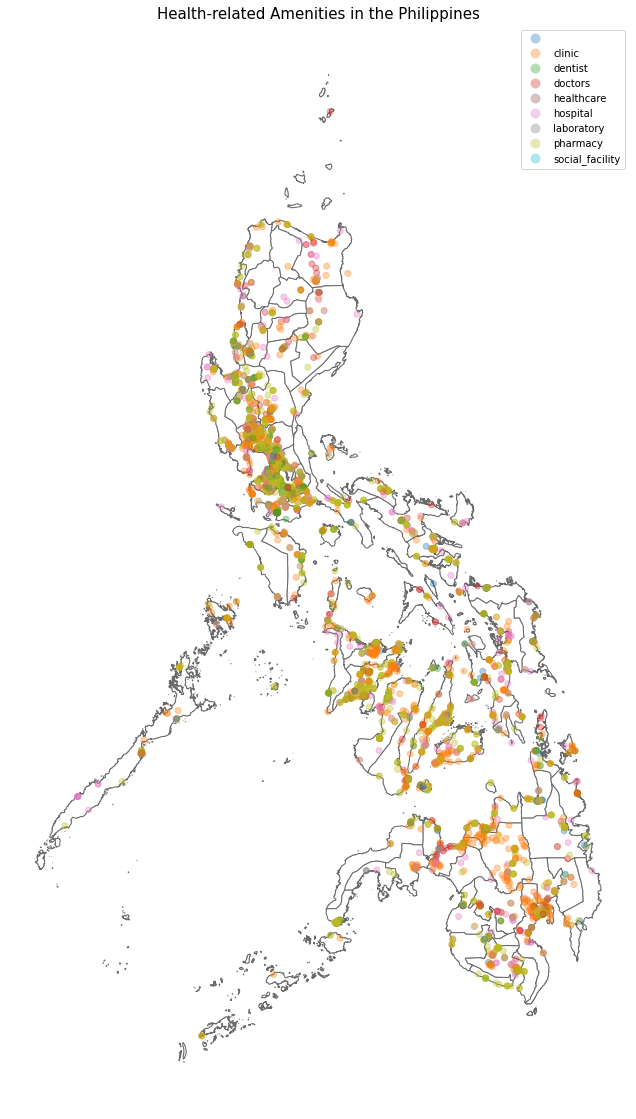

In [6]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)

ax.axis('off');

## Amenities near provinces

Provinces are Metropolitan Manila and Bulacan. Cities are Manila, Quezon City, Calumpit, San Jose del Monte, and Malolos

### All amenities

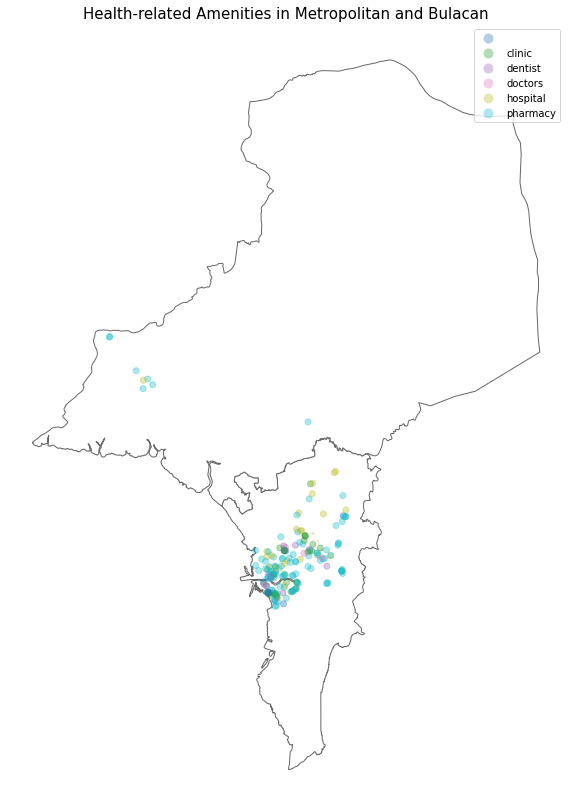

In [7]:
mm = ph[(ph.NAME_1=="Metropolitan Manila") | (ph.NAME_1=="Bulacan")]
provinces = healthsites[(healthsites.addr_city=='Manila') | (healthsites.addr_city=='Quezon City') | (healthsites.addr_city == 'Calumpit') | (healthsites.addr_city == 'San Jose del Monte') | (healthsites.addr_city == 'Malolos')]
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
provinces.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metropolitan and Bulacan', fontsize=15)
ax.axis('off');

#save img
plt.savefig('final_visualization.png', dpi=150)

### Clinic

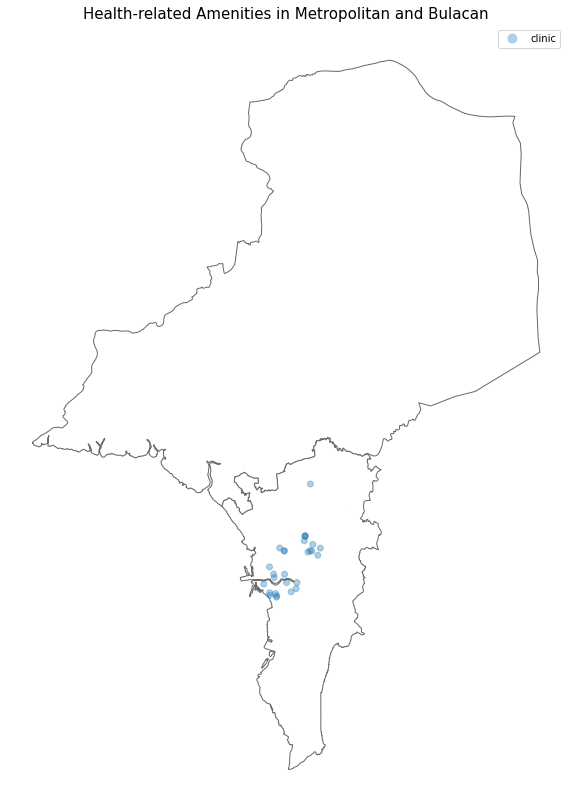

In [8]:
mm = ph[(ph.NAME_1=="Metropolitan Manila") | (ph.NAME_1=="Bulacan")]
provinces = healthsites[((healthsites.addr_city=='Manila') | (healthsites.addr_city=='Quezon City') | (healthsites.addr_city == 'Calumpit') | (healthsites.addr_city == 'San Jose del Monte') | (healthsites.addr_city == 'Malolos')) & (healthsites.amenity == 'clinic')]
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
provinces.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metropolitan and Bulacan', fontsize=15)
ax.axis('off');

### Dentist

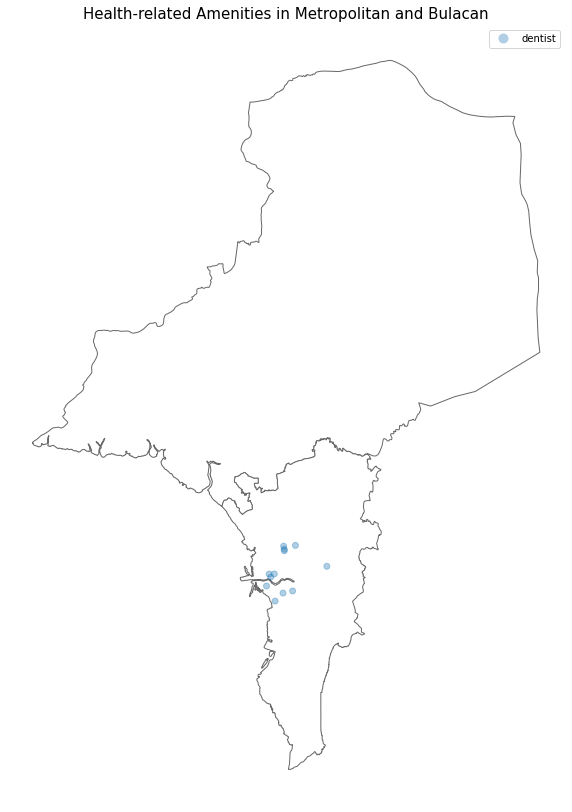

In [9]:
mm = ph[(ph.NAME_1=="Metropolitan Manila") | (ph.NAME_1=="Bulacan")]
provinces = healthsites[((healthsites.addr_city=='Manila') | (healthsites.addr_city=='Quezon City') | (healthsites.addr_city == 'Calumpit') | (healthsites.addr_city == 'San Jose del Monte') | (healthsites.addr_city == 'Malolos')) & (healthsites.amenity == 'dentist')]
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
provinces.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metropolitan and Bulacan', fontsize=15)
ax.axis('off');

### Doctor

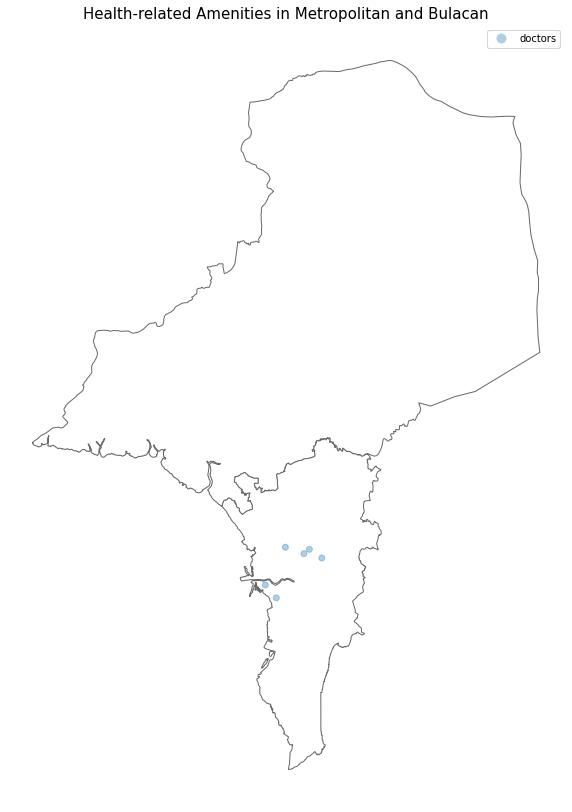

In [10]:
mm = ph[(ph.NAME_1=="Metropolitan Manila") | (ph.NAME_1=="Bulacan")]
provinces = healthsites[((healthsites.addr_city=='Manila') | (healthsites.addr_city=='Quezon City') | (healthsites.addr_city == 'Calumpit') | (healthsites.addr_city == 'San Jose del Monte') | (healthsites.addr_city == 'Malolos')) & (healthsites.amenity == 'doctors')]
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
provinces.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metropolitan and Bulacan', fontsize=15)
ax.axis('off');

### Hospital

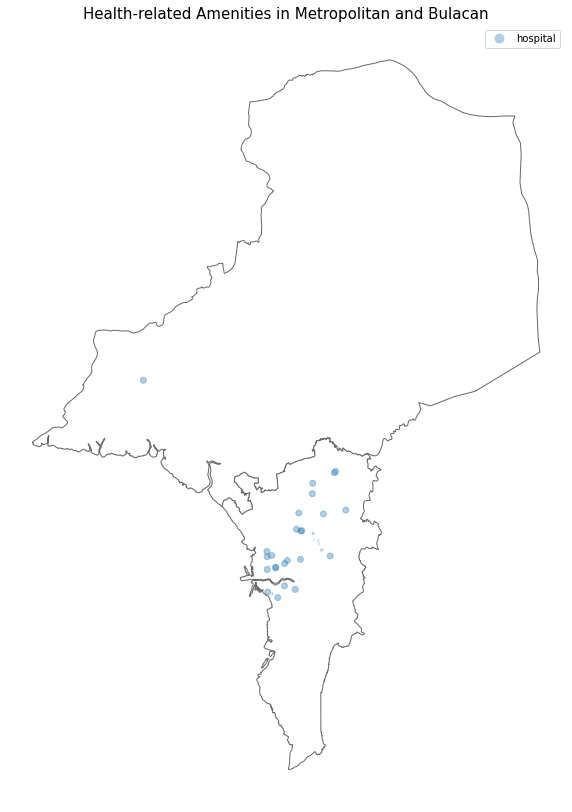

In [11]:
mm = ph[(ph.NAME_1=="Metropolitan Manila") | (ph.NAME_1=="Bulacan")]
provinces = healthsites[((healthsites.addr_city=='Manila') | (healthsites.addr_city=='Quezon City') | (healthsites.addr_city == 'Calumpit') | (healthsites.addr_city == 'San Jose del Monte') | (healthsites.addr_city == 'Malolos')) & (healthsites.amenity == 'hospital')]
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
provinces.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metropolitan and Bulacan', fontsize=15)
ax.axis('off');

### Pharmacy

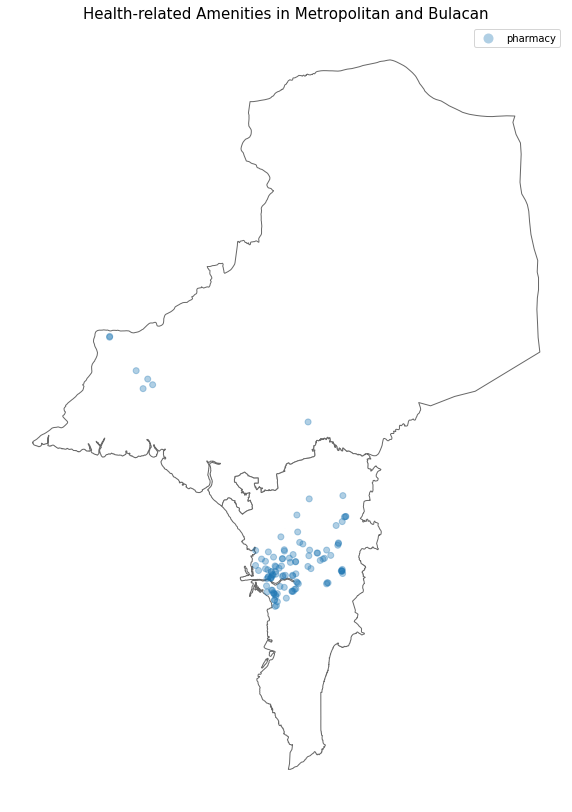

In [12]:
mm = ph[(ph.NAME_1=="Metropolitan Manila") | (ph.NAME_1=="Bulacan")]
provinces = healthsites[((healthsites.addr_city=='Manila') | (healthsites.addr_city=='Quezon City') | (healthsites.addr_city == 'Calumpit') | (healthsites.addr_city == 'San Jose del Monte') | (healthsites.addr_city == 'Malolos')) & (healthsites.amenity == 'pharmacy')]
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
provinces.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metropolitan and Bulacan', fontsize=15)
ax.axis('off');

### No label

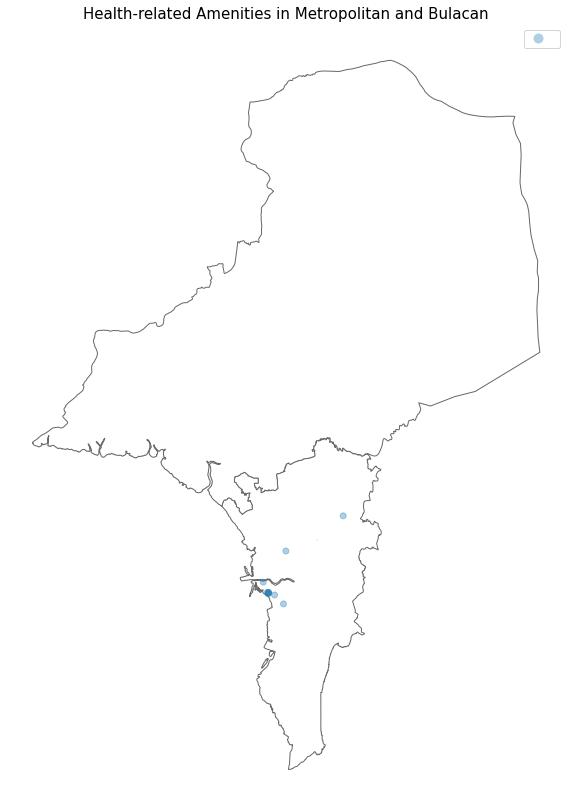

In [13]:
mm = ph[(ph.NAME_1=="Metropolitan Manila") | (ph.NAME_1=="Bulacan")]
provinces = healthsites[((healthsites.addr_city=='Manila') | (healthsites.addr_city=='Quezon City') | (healthsites.addr_city == 'Calumpit') | (healthsites.addr_city == 'San Jose del Monte') | (healthsites.addr_city == 'Malolos')) & (healthsites.amenity == '')]
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
provinces.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metropolitan and Bulacan', fontsize=15)
ax.axis('off');